## Market Risk

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

### Importing necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [4]:
stock_df = pd.read_csv('Market+Risk+Dataset.csv')

In [5]:
stock_df

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243
...,...,...,...,...,...,...,...,...,...,...,...
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14


In [6]:
stock_df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### Fixing messy column names (containing spaces) for ease of use

In [7]:
stock_df.columns = stock_df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

In [8]:
stock_df.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [9]:
print('The number of rows (observations) is',stock_df.shape[0],'\n''The number of columns (variables) is',stock_df.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [11]:
stock_df.dtypes

Date                   object
Infosys                 int64
Indian_Hotel            int64
Mahindra_&_Mahindra     int64
Axis_Bank               int64
SAIL                    int64
Shree_Cement            int64
Sun_Pharma              int64
Jindal_Steel            int64
Idea_Vodafone           int64
Jet_Airways             int64
dtype: object

In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [14]:
stock_df.shape

(314, 11)

In [16]:
stock_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_&_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


In [18]:
#Let us plot & see price trend over time for different companies

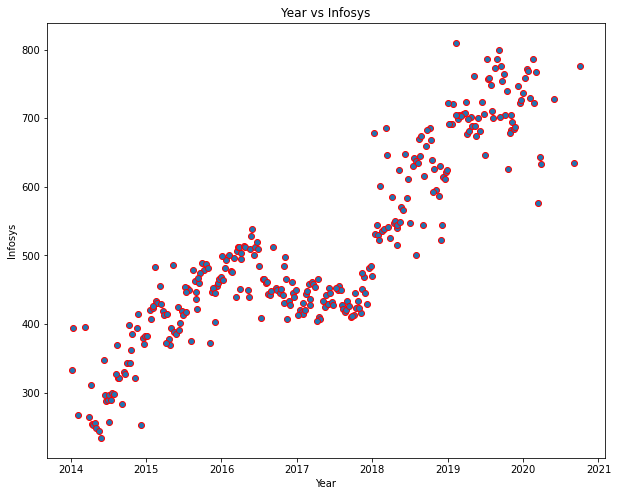

In [24]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Infosys'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Year vs Infosys')

plt.show()

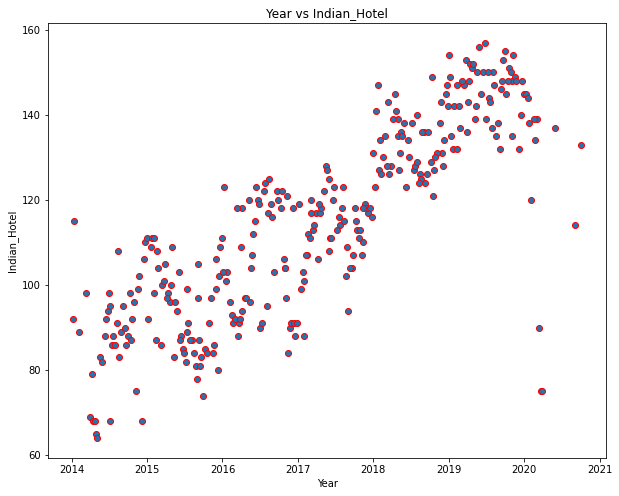

In [26]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Indian_Hotel'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Indian_Hotel')
plt.title('Year vs Indian_Hotel')

plt.show()

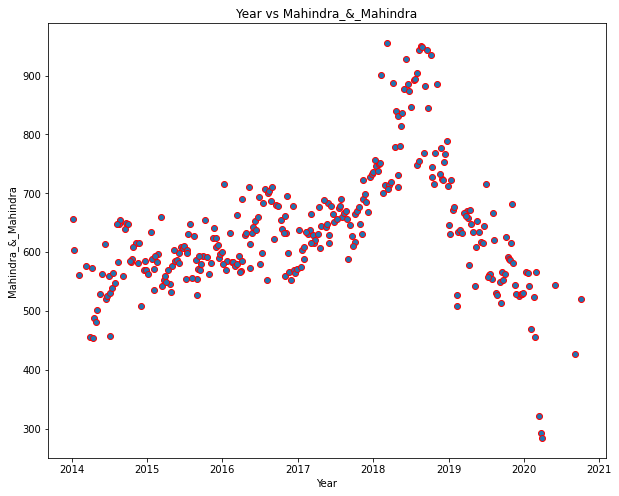

In [27]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Mahindra_&_Mahindra'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Year vs Mahindra_&_Mahindra')

plt.show()

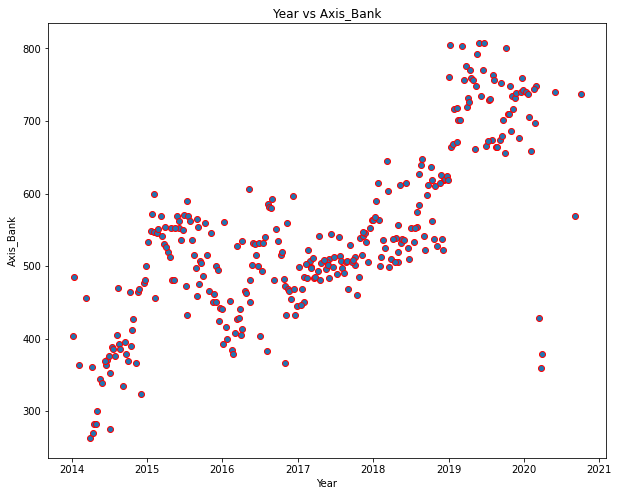

In [28]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Axis_Bank'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Year vs Axis_Bank')
plt.show()

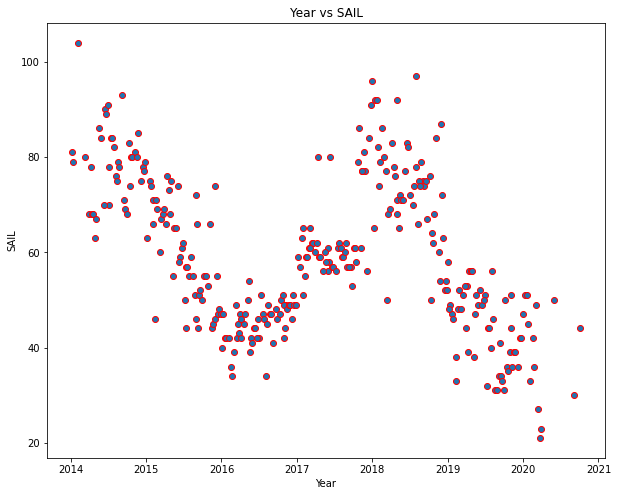

In [29]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['SAIL'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('Year vs SAIL')
plt.show()

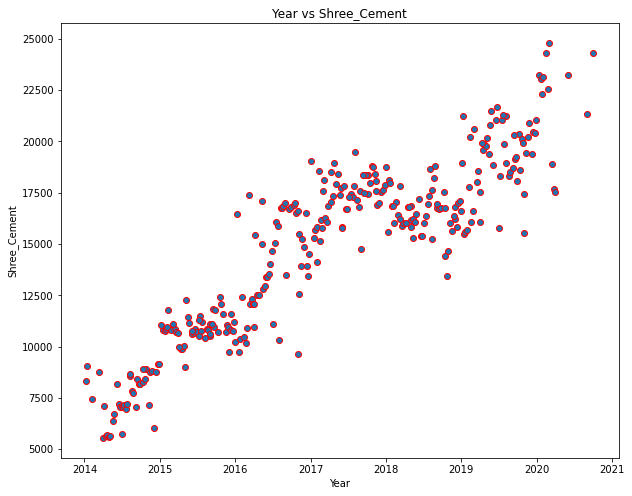

In [30]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Shree_Cement'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Year vs Shree_Cement')
plt.show()

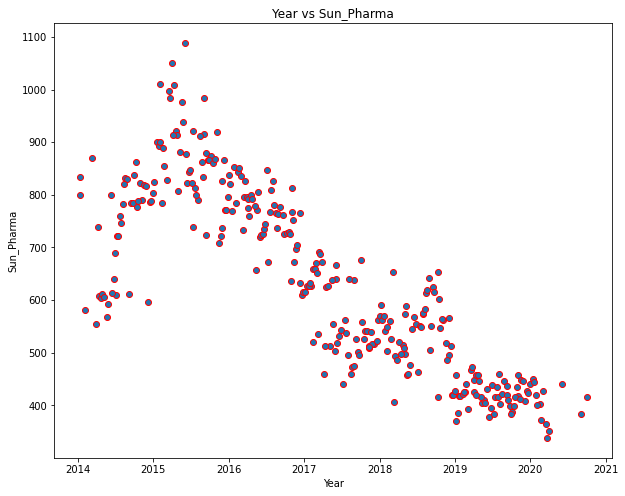

In [31]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Sun_Pharma'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Sun_Pharma')
plt.title('Year vs Sun_Pharma')
plt.show()

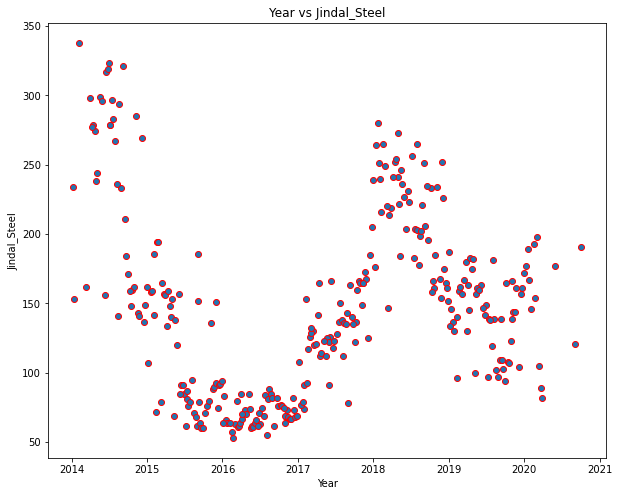

In [32]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Jindal_Steel'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Jindal_Steel')
plt.title('Year vs Jindal_Steel')
plt.show()

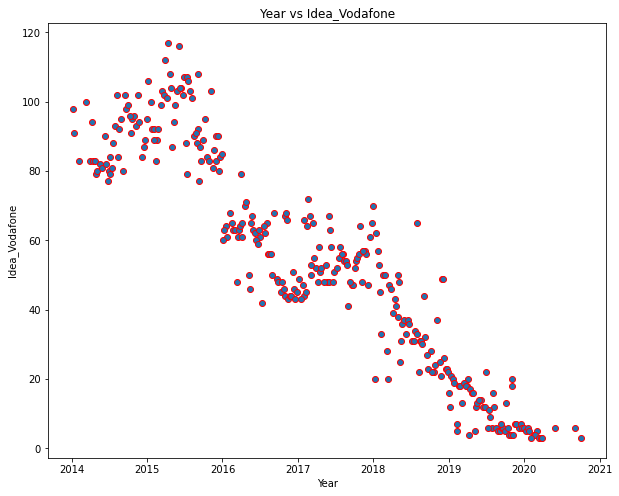

In [33]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Idea_Vodafone'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Year vs Idea_Vodafone')
plt.show()

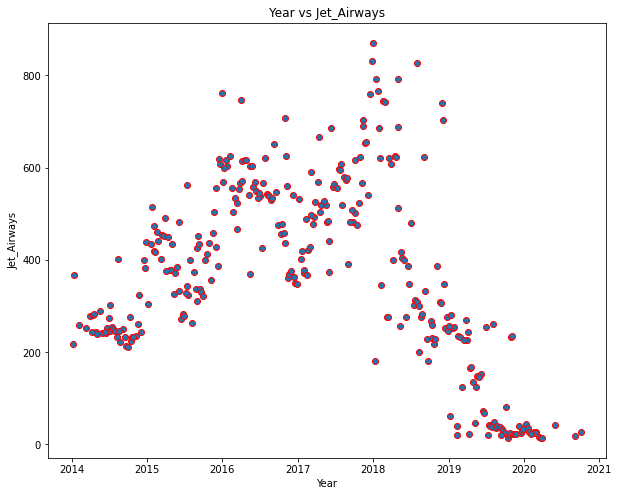

In [34]:
plt.figure(figsize = (10, 8))
stock_df['dates'] = [pd.to_datetime(d) for d in stock_df['Date']]
plt.scatter(stock_df['dates'], stock_df['Jet_Airways'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Year vs Jet_Airways')
plt.show()

Text(0.5, 1.0, 'SAIL stock price across years')

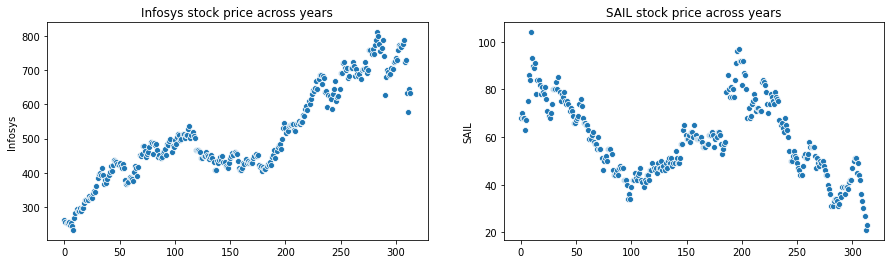

In [43]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(data=stock_df, x= stock_df.index, y= 'Infosys')
plt.title('Infosys stock price across years')

plt.subplot(1,2,2)
sns.scatterplot(data=stock_df, x= stock_df.index, y= 'SAIL')
plt.title('SAIL stock price across years')

## Analyzing returns

Steps for calculating returns from prices:

1.Take logarithms

2.Take differences

In [35]:
stock_returns = np.log(stock_df.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [36]:
stock_returns.shape

(314, 10)

In [37]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [38]:
stock_returns

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


## Let us now look at Means & Standard Deviations of these returns

Stock Mean: Average returns that the stock is making on a week to week basis

Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

In [39]:
#Calculating stock means
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

In [40]:
#Calculating stock standard deviation
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

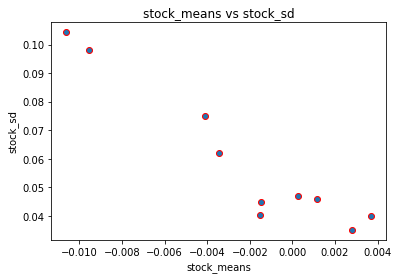

In [41]:
#Let us plot & see what they say about stock prices
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

### Conclusion and Recommendations

#### Stock with the low mean & high standard deviation do not play a role in the portfolio that has competing stock with more returns & less risk.

Thus for the data we have here,

we are left with only few stocks:

One with highest return and lowest risk & One with lowest risk and highest return

Therefore, 

**From pure Returns perspective, Shree_Cement followed by Infosys & Axis_Bank looks good in this dataset.**

**From pure Risk perspective (as measured from standard deviation), Infosys followed by ShreeCement & Mahindra&_Mahindra looks good in this dataset**



#### Recommendations

1. The graph for stock means and stock standard deviation helps us to understand the relationship and the spread of stocks. 

2. This plot helps us to asses the risk to reward ratio. 

3. More volatile stock might give short term gains but might not be  a  good investment in long term. 

4. Whereas a low volatile stock  might  not  be  a  good  investment  in short term, but might give a good return in long term.

5. Hence, based on the type of investment one is looking for, the inference should be made from the above mentioned plot.
